In [29]:
# Titanic Kaggle 
import pandas as pd

In [30]:
data = pd.read_csv('U4_04_train.csv')

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Survived', ylabel='count'>

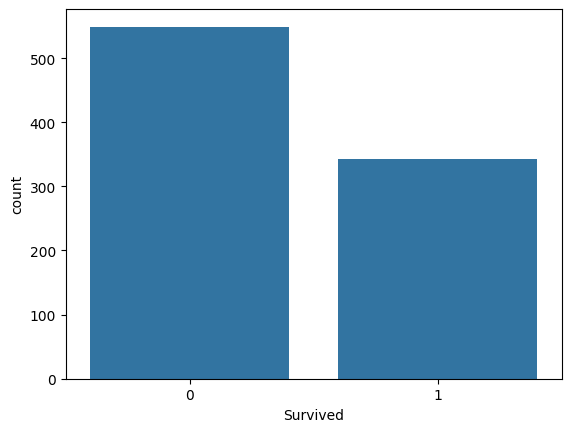

In [33]:
import seaborn as sb
sb.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

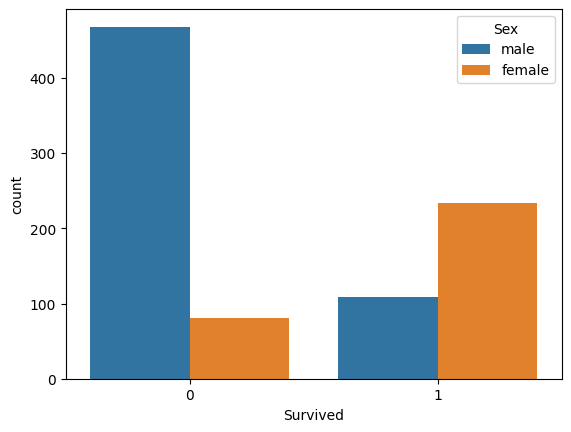

In [34]:
sb.countplot(x='Survived', data=data, hue="Sex")

In [35]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

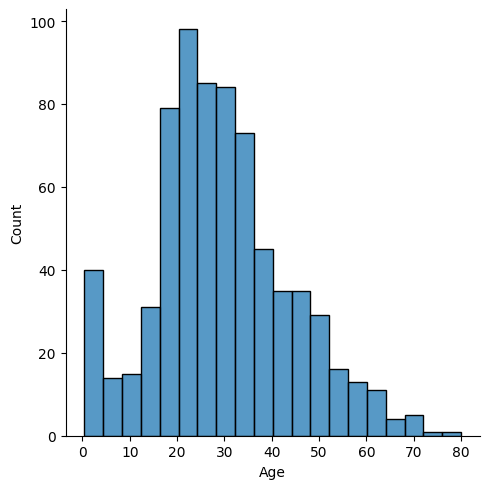

In [36]:
sb.displot(x=data['Age'], data=data)

In [37]:
data['Age'].mean()

np.float64(29.69911764705882)

In [38]:
data['Age'].fillna(data['Age'].mean())


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [39]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [40]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
data = data.drop(['Cabin'], axis=1)

In [42]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [43]:
data = data.dropna()

In [44]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [46]:
dummies_sex = pd.get_dummies(data["Sex"], drop_first=True, dtype=int)

In [47]:
data = pd.concat([data, dummies_sex], axis=1)

In [48]:
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

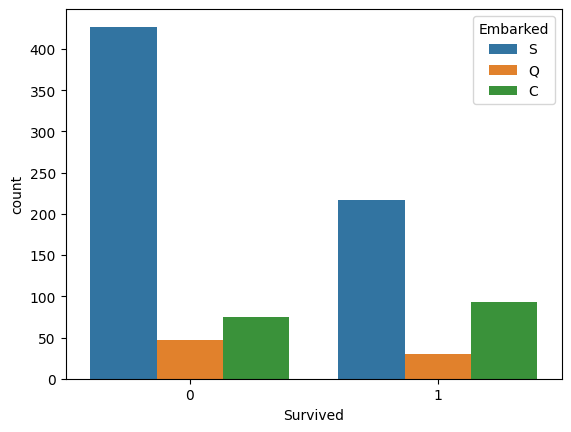

In [49]:
sb.countplot(x='Survived', data=data, hue="Embarked")

In [50]:
dummies_embarked = pd.get_dummies(data["Embarked"], drop_first=True, dtype=int)
data = pd.concat([data, dummies_embarked], axis=1)
data = data.drop(["Embarked"], axis=1)

In [51]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

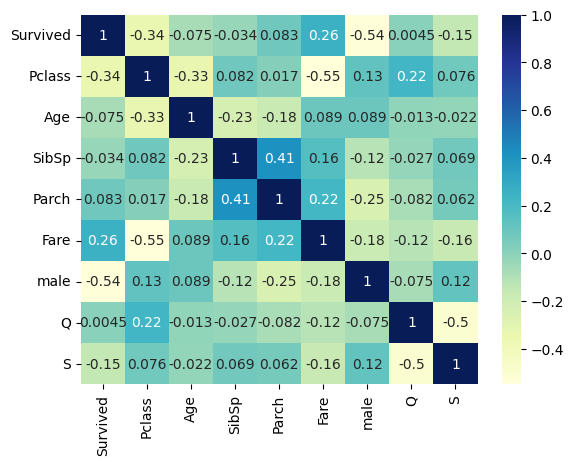

In [52]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

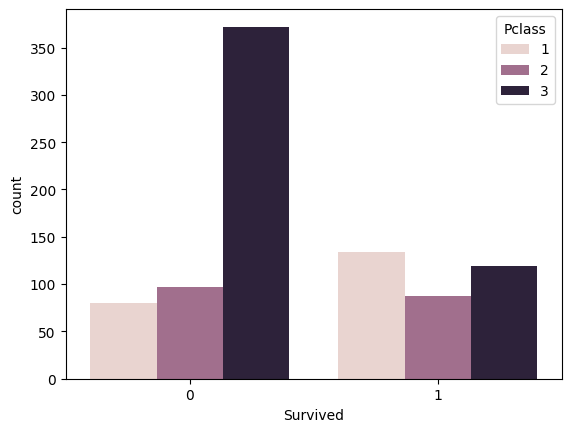

In [53]:
sb.countplot(x='Survived', data=data, hue="Pclass")

In [54]:
X = data.drop(['Survived'], axis=1)

In [55]:
Y = data['Survived']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", max_depth=50)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.7752808988764045

In [65]:
from sklearn.tree import DecisionTreeClassifier

responses = []
for i in range(1, 25):
    model = DecisionTreeClassifier(criterion="gini", max_depth=i)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print(f"Accuracy for depth {i}: {accuracy}")
    responses.append(accuracy)

Accuracy for depth 1: 0.8033707865168539
Accuracy for depth 2: 0.8033707865168539
Accuracy for depth 3: 0.8258426966292135
Accuracy for depth 4: 0.8258426966292135
Accuracy for depth 5: 0.8314606741573034
Accuracy for depth 6: 0.8370786516853933
Accuracy for depth 7: 0.8258426966292135
Accuracy for depth 8: 0.8370786516853933
Accuracy for depth 9: 0.797752808988764
Accuracy for depth 10: 0.8033707865168539
Accuracy for depth 11: 0.7865168539325843
Accuracy for depth 12: 0.7640449438202247
Accuracy for depth 13: 0.7528089887640449
Accuracy for depth 14: 0.7696629213483146
Accuracy for depth 15: 0.7584269662921348
Accuracy for depth 16: 0.7808988764044944
Accuracy for depth 17: 0.7640449438202247
Accuracy for depth 18: 0.7808988764044944
Accuracy for depth 19: 0.7584269662921348
Accuracy for depth 20: 0.7921348314606742
Accuracy for depth 21: 0.7584269662921348
Accuracy for depth 22: 0.7640449438202247
Accuracy for depth 23: 0.7808988764044944
Accuracy for depth 24: 0.7359550561797753


<Axes: >

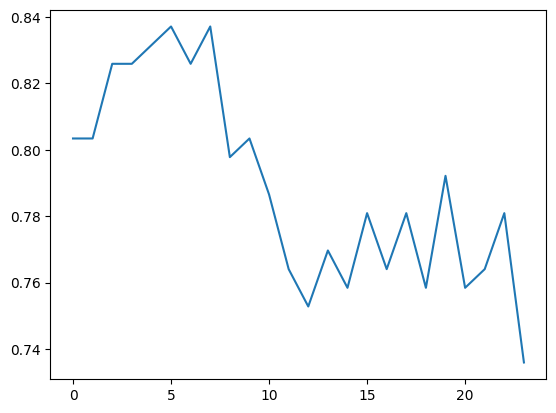

In [66]:
sb.lineplot(data=responses)

In [68]:
model = DecisionTreeClassifier(criterion="gini", max_depth=6)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy for depth {i}: {accuracy}")


Accuracy for depth 24: 0.848314606741573


In [69]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       112
           1       0.85      0.71      0.78        66

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.84       178



In [73]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_test, predictions), columns=["Predicted No", "Predicted Yes"], index=["Actual No", "Actual Yes"])

,Predicted No,Predicted Yes
Actual No,104,8
Actual Yes,19,47


[Text(0.46375, 0.9285714285714286, 'male <= 0.5\n0.474\n711\n[437, 274]\nDied'),
 Text(0.18, 0.7857142857142857, 'Pclass <= 2.5\n0.388\n251\n[66, 185]\nSurvived'),
 Text(0.321875, 0.8571428571428572, 'True  '),
 Text(0.08, 0.6428571428571429, 'Age <= 2.5\n0.088\n130\n[6, 124]\nSurvived'),
 Text(0.04, 0.5, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nDied'),
 Text(0.02, 0.35714285714285715, '0.0\n1\n[0, 1]\nSurvived'),
 Text(0.06, 0.35714285714285715, '0.0\n1\n[1, 0]\nDied'),
 Text(0.12, 0.5, 'Fare <= 28.856\n0.075\n128\n[5, 123]\nSurvived'),
 Text(0.1, 0.35714285714285715, 'Fare <= 28.231\n0.174\n52\n[5, 47]\nSurvived'),
 Text(0.08, 0.21428571428571427, 'Age <= 56.0\n0.145\n51\n[4, 47]\nSurvived'),
 Text(0.06, 0.07142857142857142, '0.115\n49\n[3, 46]\nSurvived'),
 Text(0.1, 0.07142857142857142, '0.5\n2\n[1, 1]\nDied'),
 Text(0.12, 0.21428571428571427, '0.0\n1\n[1, 0]\nDied'),
 Text(0.14, 0.35714285714285715, '0.0\n76\n[0, 76]\nSurvived'),
 Text(0.28, 0.6428571428571429, 'S <= 0.5\n0.5\n121\n[60, 61]

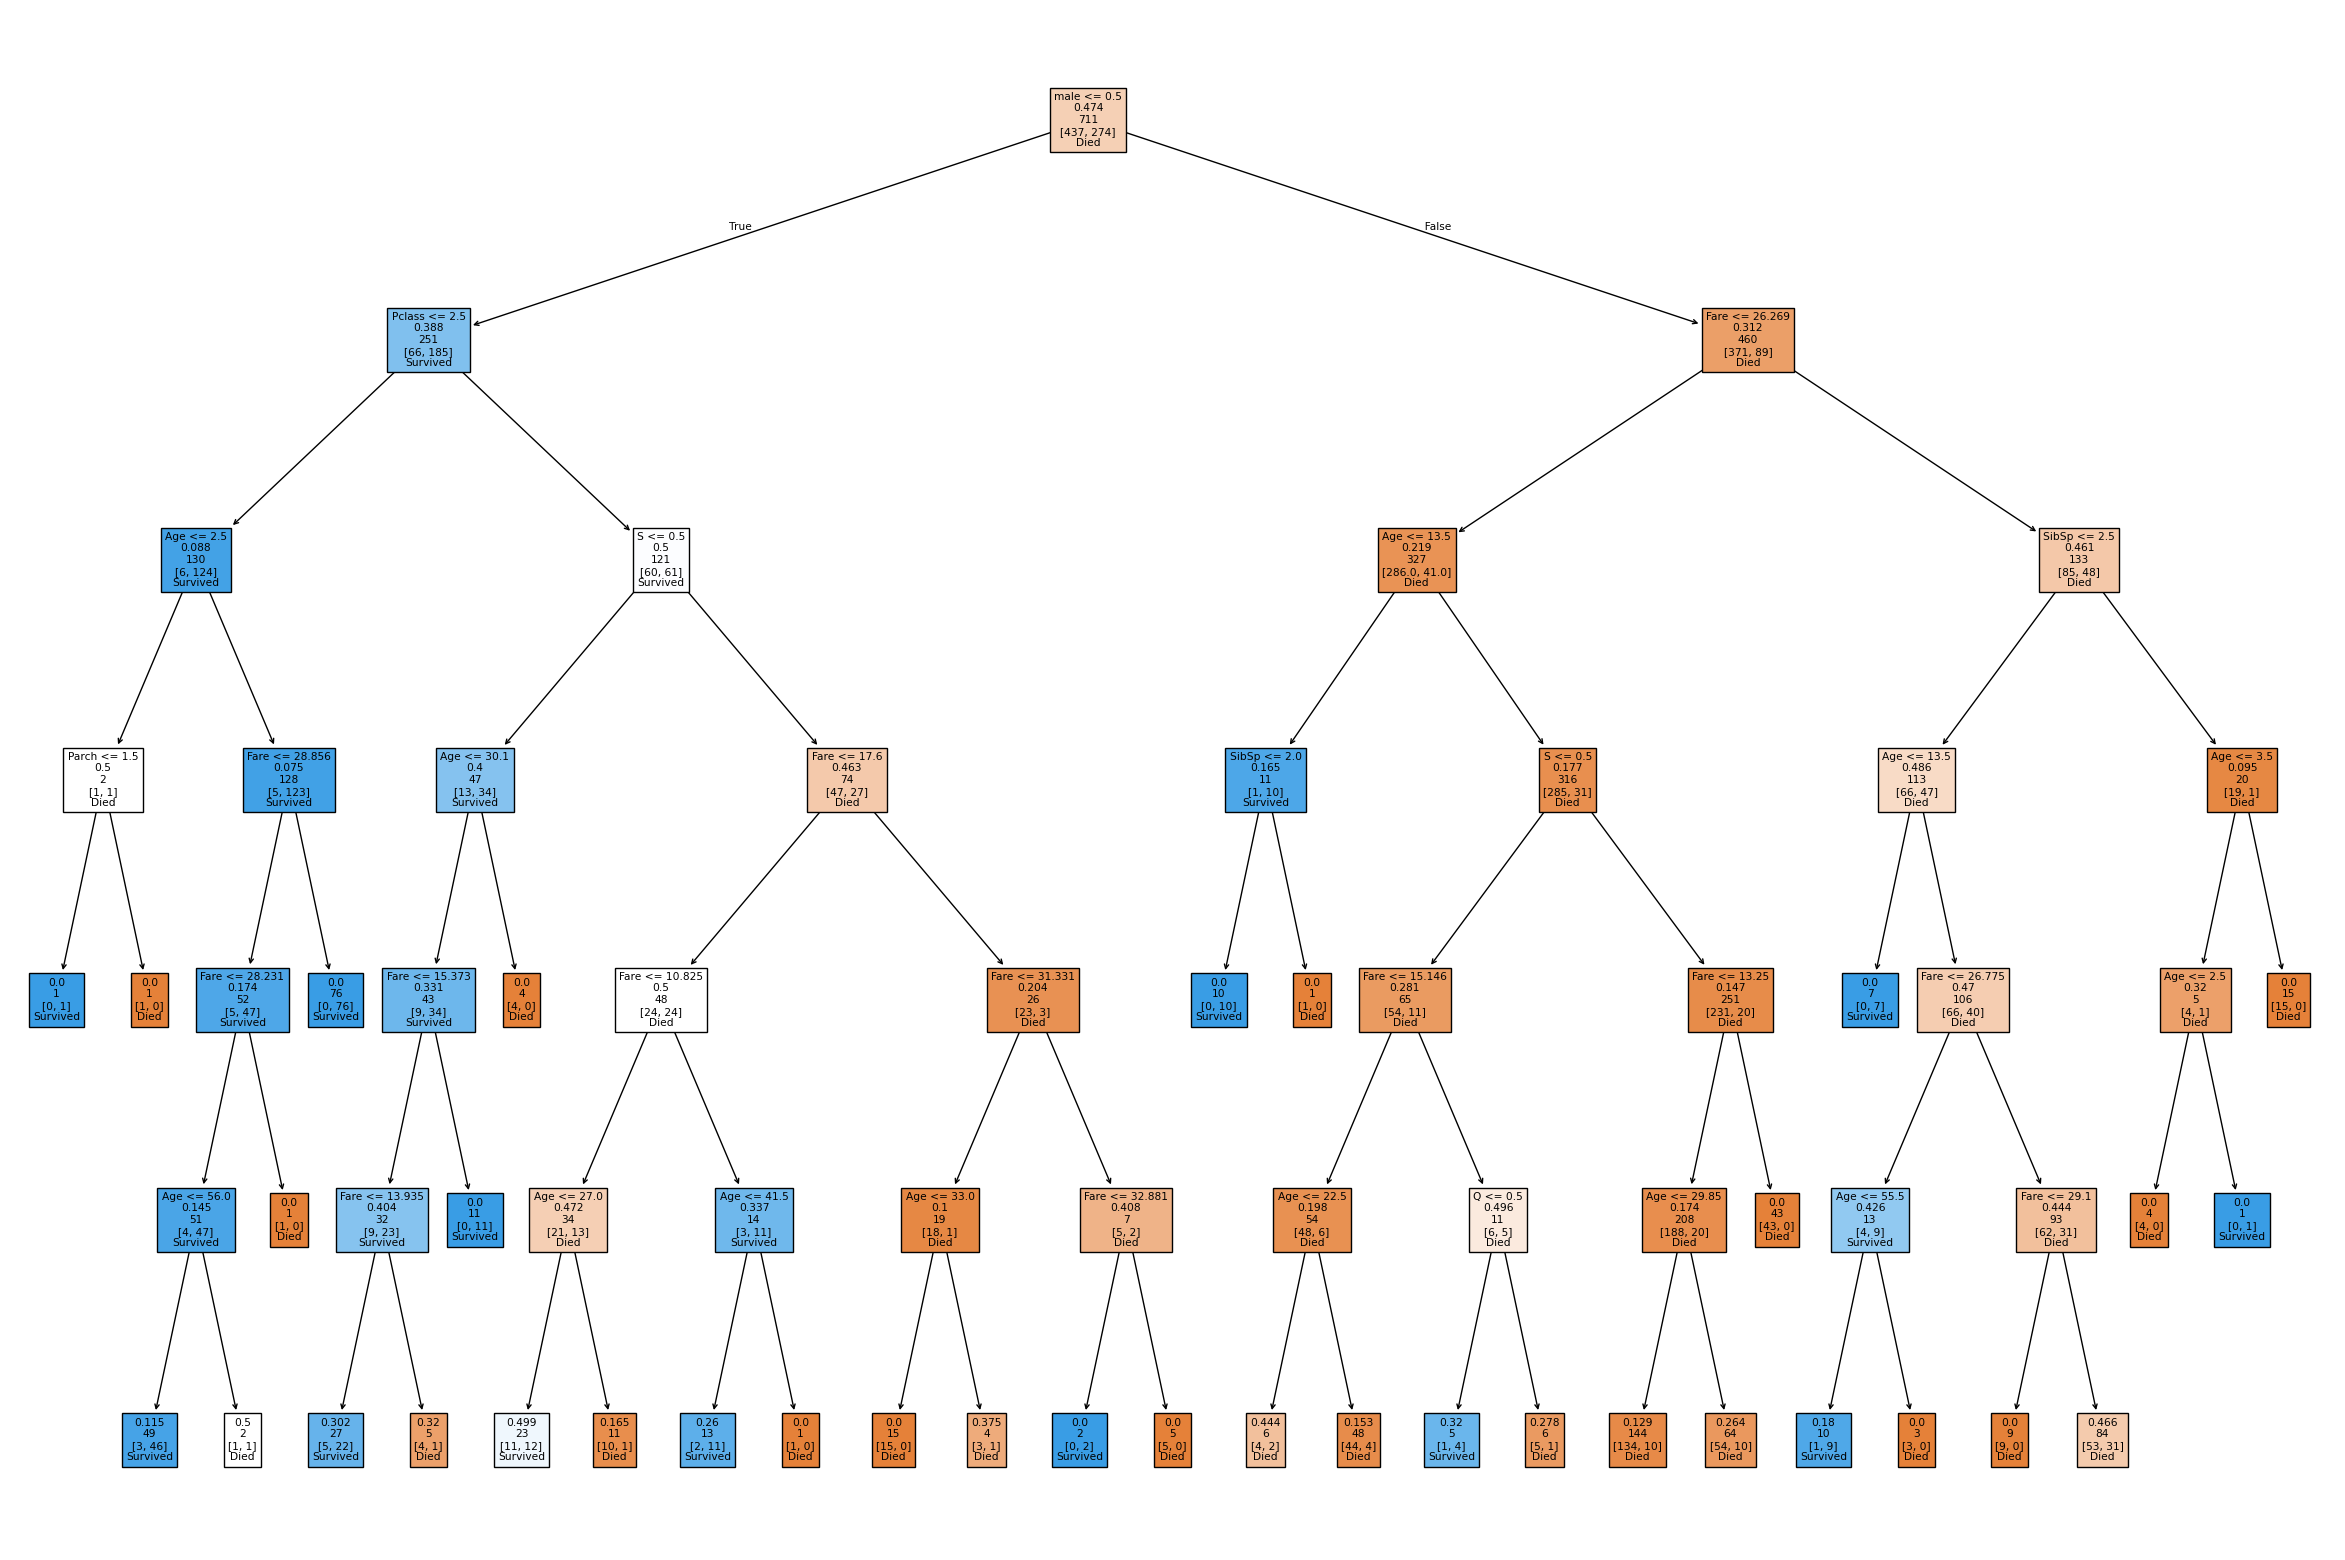

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
plot_tree(model, feature_names=X_train.columns, filled=True, class_names=["Died", "Survived"], label="none")

# Previous linear

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

model.fit(X_train, Y_train)


LogisticRegression(max_iter=10000)

In [90]:
prediction = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.7612359550561798

In [92]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       224
           1       0.69      0.66      0.67       132

    accuracy                           0.76       356
   macro avg       0.74      0.74      0.74       356
weighted avg       0.76      0.76      0.76       356



In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, prediction)


array([[184,  40],
       [ 45,  87]])

In [94]:
pd.DataFrame(confusion_matrix(Y_test, prediction), columns=["Prediction: No", "Prediction: Yes"], index=["Real:No","Real:Yes"])

,Prediction: No,Prediction: Yes
Real:No,184,40
Real:Yes,45,87


In [95]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [118]:
new_person = [3,30,0,0,100,1,0,0]
do_prediction = model.predict([new_person])

if do_prediction[0] == 1:
    print("You survived")
else:
    print("You die")

You die


/Users/diegochavez/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
